In [1]:
%matplotlib inline

import datetime
import pandas as pd

뉴욕 바이크 쉐어링 회사에서 공개한 데이터

터미널 정보가 하나. 터미널 정보가 없다고 보면 되고
holiday 컬럼부터~ <br>
공휴일인지/평일인지/숫자가 높을 수록 날씨가 좋지 않음/기온/체감온도(?)/?/?/그냥 이용/정기권이용/총 횟수

In [3]:
train = pd.read_csv('./Data/train.csv')
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


## EDA

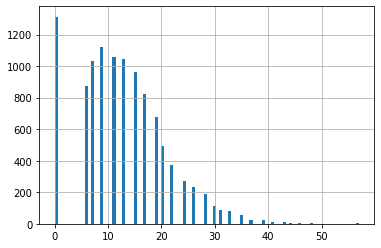

In [8]:
train['windspeed'].hist(bins=100)

# 풍속이 정말 0인지 Null (사실 null 값은 없지만)인지 알 수 없음
# 한시간 간격 데이터 인데 0이였다가 6이였다가 0이였다가 6이라면 그 데이터는 잘못된 것 아닐까?

Q1. 0값인 풍속 데이터를 어떻게 채워넣을 수 있을 까요?

humidity와 상관관계가 있지 않을까? 이걸 기반으로 데이터를 채워넣어볼까?

0이 아닌 값들 사이에 0이 껴있다면 그 두 값의 평균을 넣자!

!! 0을 채워넣는 방법을 익히는 것 보다는 0을 채워넣어야 한다는 것을 찾아내고 인지하는 것이 중요하다 !!

In [ ]:
sql_query = """
  SELECT first_name, last_name
  FROM actor
"""

Q2. 1시간 전, 후 풍속 값의 평균으로 0을 채워 넣어 보세요

In [9]:
train['windspeed_v1'] = train['windspeed']

In [11]:
train['windspeed_lag'] = train['windspeed'].shift(1, fill_value = 0) 
# 1개씩 밀어준다. 맨 앞 데이터는 밀 데이터가 없어서 fill_value = 0으로!

train['windspeed_lead'] = train['windspeed'].shift(-1, fill_value = 0)

In [12]:
train['windspeed_mean_of_ll'] = (train['windspeed_lag'] + train['windspeed_lead'])/2

# (train['windspeed_lag'] + train['windspeed_lead']).mean() 을 하게 되면 전체 데이터에 대한 mean 값 하나만 나온다

In [13]:
train.loc[train['windspeed_v1'] == 0.0, 'windspeed_v1'] = train.loc[train['windspeed_v1'] == 0.0, 'windspeed_mean_of_ll']

In [14]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,windspeed_v1,windspeed_lag,windspeed_lead,windspeed_mean_of_ll
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0.00000,0.0000,0.0000,0.00000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0.00000,0.0000,0.0000,0.00000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0.00000,0.0000,0.0000,0.00000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0.00000,0.0000,0.0000,0.00000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,3.00160,0.0000,6.0032,3.00160
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,6.00320,0.0000,0.0000,0.00000
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,3.00160,6.0032,0.0000,3.00160
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,0.00000,0.0000,0.0000,0.00000
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,0.00000,0.0000,0.0000,0.00000
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,8.49895,0.0000,16.9979,8.49895


Q3. 해당 날짜 풍속의 평균으로 0을 채워넣어보세요.

~~ 단비삽질~~

In [33]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
5        2011-01-01 05:00:00
6        2011-01-01 06:00:00
7        2011-01-01 07:00:00
8        2011-01-01 08:00:00
9        2011-01-01 09:00:00
10       2011-01-01 10:00:00
11       2011-01-01 11:00:00
12       2011-01-01 12:00:00
13       2011-01-01 13:00:00
14       2011-01-01 14:00:00
15       2011-01-01 15:00:00
16       2011-01-01 16:00:00
17       2011-01-01 17:00:00
18       2011-01-01 18:00:00
19       2011-01-01 19:00:00
20       2011-01-01 20:00:00
21       2011-01-01 21:00:00
22       2011-01-01 22:00:00
23       2011-01-01 23:00:00
24       2011-01-02 00:00:00
25       2011-01-02 01:00:00
26       2011-01-02 02:00:00
27       2011-01-02 03:00:00
28       2011-01-02 04:00:00
29       2011-01-02 06:00:00
                ...         
10856    2012-12-18 18:00:00
10857    2012-12-18 19:00:00
10858    2012-12-18 20:00:00
10859    2012-

In [27]:
# train.groupby(pd.TimeGrouper('D')).mean()
train.groupby([train['datetime'].dt.date])['windspeed'].mean()
# df.set_index('Date_Time').groupby(pd.TimeGrouper('D')).mean()

AttributeError: Can only use .dt accessor with datetimelike values

In [18]:
train.groupby('datetime')['windspeed'].mean()

datetime
2011-01-01 00:00:00     0.0000
2011-01-01 01:00:00     0.0000
2011-01-01 02:00:00     0.0000
2011-01-01 03:00:00     0.0000
2011-01-01 04:00:00     0.0000
2011-01-01 05:00:00     6.0032
2011-01-01 06:00:00     0.0000
2011-01-01 07:00:00     0.0000
2011-01-01 08:00:00     0.0000
2011-01-01 09:00:00     0.0000
2011-01-01 10:00:00    16.9979
2011-01-01 11:00:00    19.0012
2011-01-01 12:00:00    19.0012
2011-01-01 13:00:00    19.9995
2011-01-01 14:00:00    19.0012
2011-01-01 15:00:00    19.9995
2011-01-01 16:00:00    19.9995
2011-01-01 17:00:00    19.0012
2011-01-01 18:00:00    16.9979
2011-01-01 19:00:00    16.9979
2011-01-01 20:00:00    16.9979
2011-01-01 21:00:00    12.9980
2011-01-01 22:00:00    15.0013
2011-01-01 23:00:00    19.9995
2011-01-02 00:00:00    19.9995
2011-01-02 01:00:00    16.9979
2011-01-02 02:00:00    19.0012
2011-01-02 03:00:00    12.9980
2011-01-02 04:00:00    12.9980
2011-01-02 06:00:00    19.9995
                        ...   
2012-12-18 18:00:00    22.0028

~~ 여기까지 나의 삽질~~

In [36]:
# 선미님 코드
train['windspeed_q3'] = train['windspeed']
train['datetime_date'] = pd.to_datetime(train['datetime']).dt.date
train['windspeed_mean_of_date'] = train.groupby('datetime_date')['windspeed'].transform(lambda x: x.mean())

# groupby 해놓은 데이터를 한번에 먹일 때 transform 사용
# 행별로 먹일 때에는 apply + lambda

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
5        2011-01-01
6        2011-01-01
7        2011-01-01
8        2011-01-01
9        2011-01-01
10       2011-01-01
11       2011-01-01
12       2011-01-01
13       2011-01-01
14       2011-01-01
15       2011-01-01
16       2011-01-01
17       2011-01-01
18       2011-01-01
19       2011-01-01
20       2011-01-01
21       2011-01-01
22       2011-01-01
23       2011-01-01
24       2011-01-02
25       2011-01-02
26       2011-01-02
27       2011-01-02
28       2011-01-02
29       2011-01-02
            ...    
10856    2012-12-18
10857    2012-12-18
10858    2012-12-18
10859    2012-12-18
10860    2012-12-18
10861    2012-12-18
10862    2012-12-19
10863    2012-12-19
10864    2012-12-19
10865    2012-12-19
10866    2012-12-19
10867    2012-12-19
10868    2012-12-19
10869    2012-12-19
10870    2012-12-19
10871    2012-12-19
10872    2012-12-19
10873    2012-12-19
10874    2012-12-19
